<a href="https://colab.research.google.com/github/hsallrounder/Introduction-to-Machine-Learning-Lab/blob/master/Linear_Regression_on_Headbrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/Datasets/headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
df.tail()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


In [ ]:
X=df['Head Size(cm^3)']
Y=df['Brain Weight(grams)']
print(X)
print(Y)

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: Head Size(cm^3), Length: 237, dtype: int64
0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: Brain Weight(grams), Length: 237, dtype: int64


Line of equation is: y=0.26*x+325.57


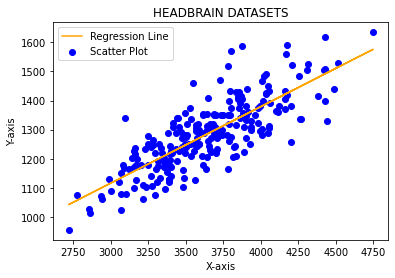

In [ ]:
import matplotlib.pyplot as plt

sigmax=0
sigmay=0
for i in range(len(X)):
  sigmax+=X[i]
  sigmay+=Y[i]

meanx=sigmax/len(X)
meany=sigmay/len(Y)
X_mx=[]
Y_my=[]
for i in X:
  X_mx.append(i-meanx)
for i in Y:
  Y_my.append(i-meany)  

X_mX_sqr=[]
X_mX_Y_mY=[]
for i in X_mx:
  X_mX_sqr.append(i*i)
for i in range(len(X)):
  X_mX_Y_mY.append(X_mx[i]*Y_my[i])

s_X_mX_sqr=0
s_X_mX_Y_mY=0
for i in range(len(X)):
  s_X_mX_sqr+=X_mX_sqr[i]
  s_X_mX_Y_mY+=X_mX_Y_mY[i]
m = s_X_mX_Y_mY/s_X_mX_sqr
c = meany-(m*meanx)
print(f'Line of equation is: y={m:.2f}*x+{c:.2f}')
plt.scatter(X,Y, color='Blue', label='Scatter Plot')
plt.plot(X,m*np.array(X)+c, color='Orange', label='Regression Line')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("HEADBRAIN DATASETS")
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score
pred = []
for i in X:
  y1 = m*i + c
  pred.append(y1)
s_error=0
for i in range(len(X)):
  s_error+= (pred[i]-Y[i])*(pred[i]-Y[i])

mean = s_error/len(X)
print(math.sqrt(mean))
print("R2 Score =",r2_score(Y,pred))

72.1206213783709
R2 Score = 0.639311719957


In [ ]:
#using sklearn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
X1=np.asarray(X)
y1=np.asarray(Y)

md = LinearRegression()
md.fit(X1.reshape(-1,1),y1)
print("R2 Score =",md.score(X1.reshape(-1,1),y1))
print(md.intercept_,md.coef_)

R2 Score = 0.639311719957
325.5734210494426 [0.26342934]


In [ ]:
#Verified the Model Successfully

**GRADIENT DESCENT**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/headbrain.csv')
X=df['Head Size(cm^3)'].values/1000
y=df['Brain Weight(grams)'].values/1000

In [ ]:
class GradientDescentLinearRegression:
  def __init__(self, learning_rate=0.01, iterations=200):
    self.learning_rate, self.iterations = learning_rate, iterations
  def fit(self, X, y):
    b0 = 0
    b1 = 0
    n = X.shape[0]
    for _ in range(self.iterations):
      b0_deri = np.sum(b1*X + b0 - y)/n
      b1_deri = np.sum(X*((b1*X + b0) - y))/n
      b0 = b0 - (self.learning_rate*b0_deri)
      b1 = b1 - (self.learning_rate*b1_deri)
      plt.plot(X,(b0+b1*X))
    self.b0, self.b1 = b0, b1
  def predict(self, X):
    return self.b0 + self.b1*X
  def rmse(self, X):
    rmse = 0
    n = X.shape[0]
    for i in range(n):
      y_pred = self.predict(X[i])
      rmse += (y_pred - y[i])**2
    rmse = np.sqrt(rmse/n)
    return rmse

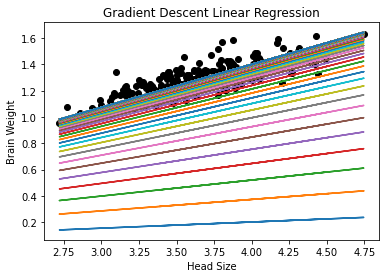

RMSE 0.07574196359651633


In [ ]:
clf = GradientDescentLinearRegression()
clf.fit(X,y)
plt.scatter(X,y,color='black')
plt.plot(X, clf.predict(X))
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.title("Gradient Descent Linear Regression")
plt.show()
#compute rmse
rmse = clf.rmse(X)
print("RMSE",rmse)